# Test STree graphics with linear kernel

# Setup
Uncomment the next cell if STree is not already installed

In [1]:
#
# Google Colab setup
#
#!pip install git+https://github.com/doctorado-ml/stree

In [2]:
import time
import random
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from stree import Stree, Stree_grapher

In [3]:
def build_data(random_state):
    random.seed(random_state)
    X, y = make_blobs(centers=10, n_features=3, n_samples=500, random_state=random_state)
    def make_binary(y):
        for i in range(2, 10):
            y[y==i] = random.randint(0, 1)
        return y
    y = make_binary(y)
    #print(X.shape, np.unique(y), y[y==0].shape, y[y==1].shape)
    return X, y

# Tests

## Prepare data

In [4]:
X, y = build_data(10)
gr = Stree_grapher(dict(C=.01, max_iter=200))
gr.fit(X, y)

Stree_grapher(params=None)

In [5]:
print(gr)

root
root - Down
root - Down - Down, <pure> - Leaf class=1 belief= 1.000000 counts=(array([1]), array([250]))
root - Down - Up, <pure> - Leaf class=0 belief= 1.000000 counts=(array([0]), array([32]))
root - Up
root - Up - Down
root - Up - Down - Down, <pure> - Leaf class=1 belief= 1.000000 counts=(array([1]), array([47]))
root - Up - Down - Up, <pure> - Leaf class=0 belief= 1.000000 counts=(array([0]), array([4]))
root - Up - Up, <cgaf> - Leaf class=0 belief= 0.982036 counts=(array([0, 1]), array([164,   3]))



## Save all graphics

In [6]:
import matplotlib
matplotlib.use('Agg')
gr.save_all(save_folder='data/')

## Plot first hyperplane

In [7]:
#Uncomment one of the following lines to display graphics: static(inline), dynamic(widget)
#%matplotlib inline
%matplotlib widget
gr._tree_gr.plot_hyperplane()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(<matplotlib.axes._subplots.Axes3DSubplot at 0x124a2b310>,
 <Figure size 800x800 with 1 Axes>)

## Plot all hyperplanes

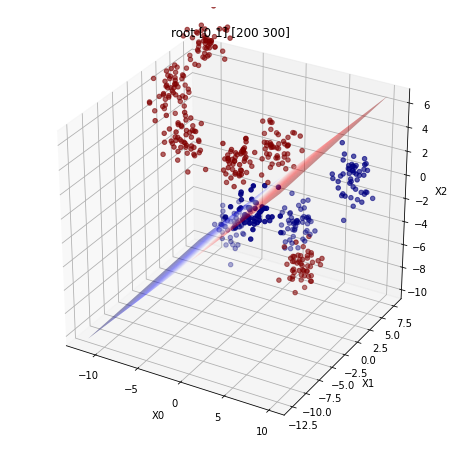

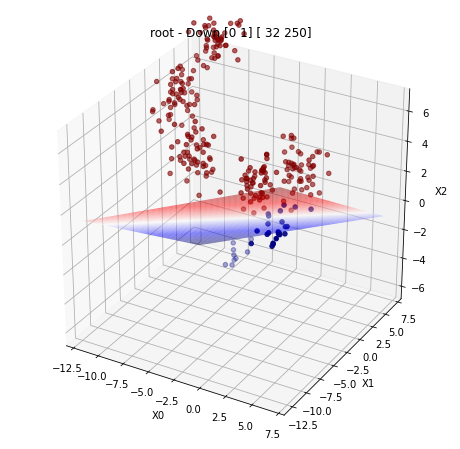

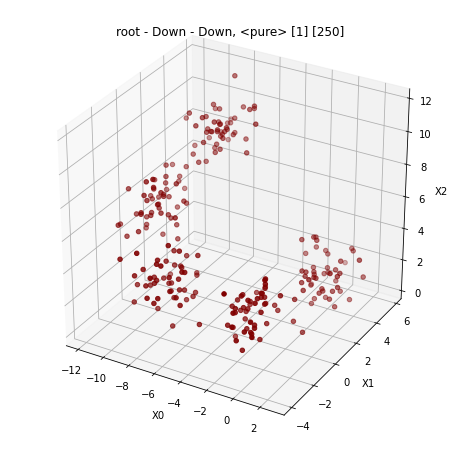

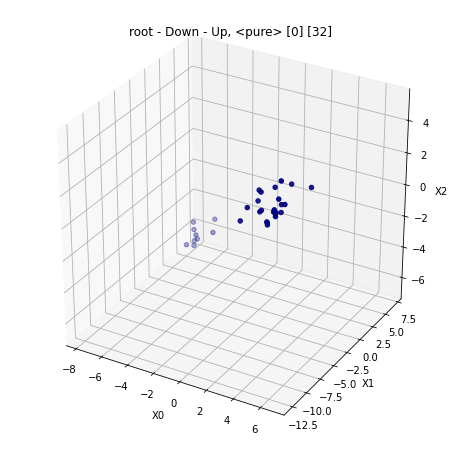

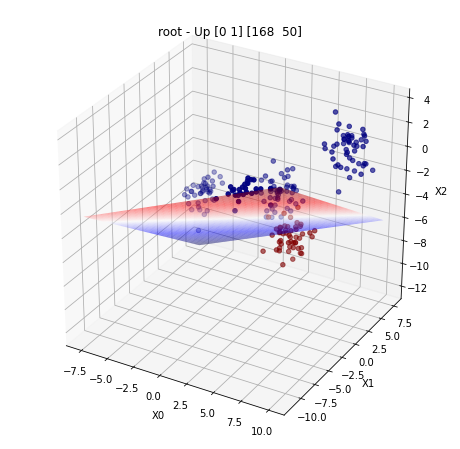

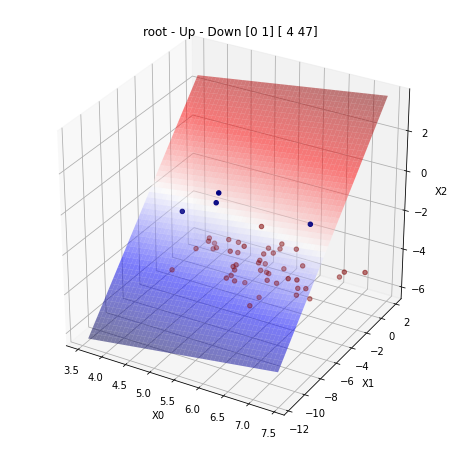

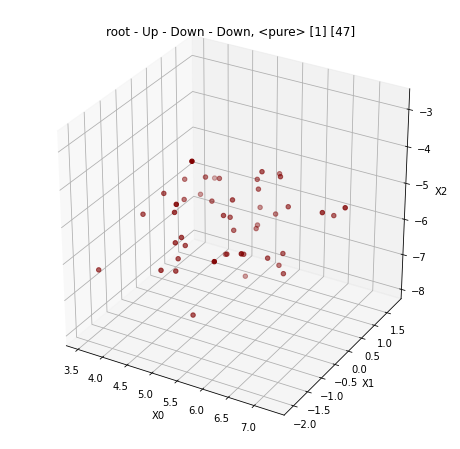

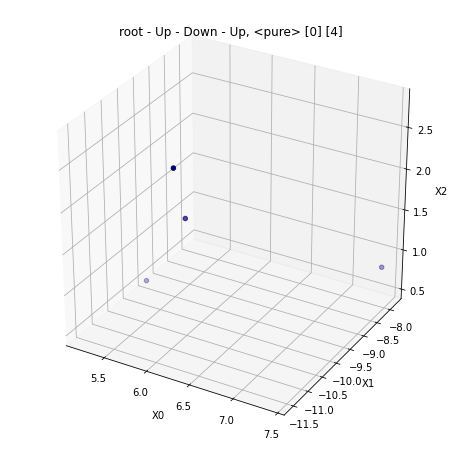

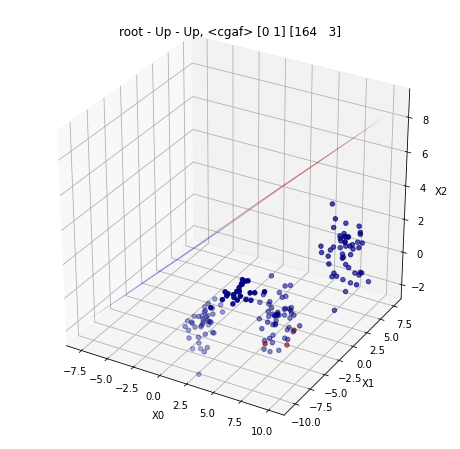

In [8]:
#Uncomment one of the following lines to display graphics: static(inline), dynamic(widget)
%matplotlib inline
#%matplotlib widget
gr.plot_all()